## Estadística Aplicada
Sesion 8 - 07 Sep
Cinthia Zayde Gabrielle Garcia Belmonte 2076329

In [1]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pip install lifelines

     ---------------------------------------- 0.0/409.4 kB ? eta -:--:--
     - -------------------------------------- 10.2/409.4 kB ? eta -:--:--
     -- ---------------------------------- 30.7/409.4 kB 330.3 kB/s eta 0:00:02
     --- --------------------------------- 41.0/409.4 kB 326.8 kB/s eta 0:00:02
     ------ ------------------------------ 71.7/409.4 kB 357.2 kB/s eta 0:00:01
     -------- ---------------------------- 92.2/409.4 kB 403.5 kB/s eta 0:00:01
     --------- -------------------------- 112.6/409.4 kB 437.6 kB/s eta 0:00:01
     --------- -------------------------- 112.6/409.4 kB 437.6 kB/s eta 0:00:01
     ---------- ------------------------- 122.9/409.4 kB 343.4 kB/s eta 0:00:01
     ------------- ---------------------- 153.6/409.4 kB 366.6 kB/s eta 0:00:01
     ----------------- ------------------ 194.6/409.4 kB 454.0 kB/s eta 0:00:01
     ------------------- ---------------- 225.3/409.4 kB 444.3 kB/s eta 0:00:01
     ---------------------- ------------- 256.0/409.4

In [35]:
from lifelines import KaplanMeierFitter 
from lifelines.statistics import logrank_test

In [8]:
pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ------ ------------------------------ 41.0/250.0 kB 245.8 kB/s eta 0:00:01
     ------------- ----------------------- 92.2/250.0 kB 476.3 kB/s eta 0:00:01
     ---------------------- ------------- 153.6/250.0 kB 706.2 kB/s eta 0:00:01
     ------------------------------------ 250.0/250.0 kB 959.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
# datos
ejer_km = pd.read_excel('Ejericio_KM.xlsx')

In [10]:
ejer_km.head()

,Individuo,Tiempo_sup,Evento
0,1,6,1
1,2,6,1
2,3,6,1
3,4,7,1
4,5,10,1


In [11]:
km1 =KaplanMeierFitter().fit(ejer_km['Tiempo_sup'],ejer_km['Evento'])

In [12]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
6.0,4,3,1,0,21
7.0,1,1,0,0,17
9.0,1,0,1,0,16
10.0,2,1,1,0,15
11.0,1,0,1,0,13
13.0,1,1,0,0,12
16.0,1,1,0,0,11
17.0,1,0,1,0,10


In [13]:
km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.857143
7.0,0.806723
9.0,0.806723
10.0,0.752941
11.0,0.752941
13.0,0.690196
16.0,0.627451
17.0,0.627451


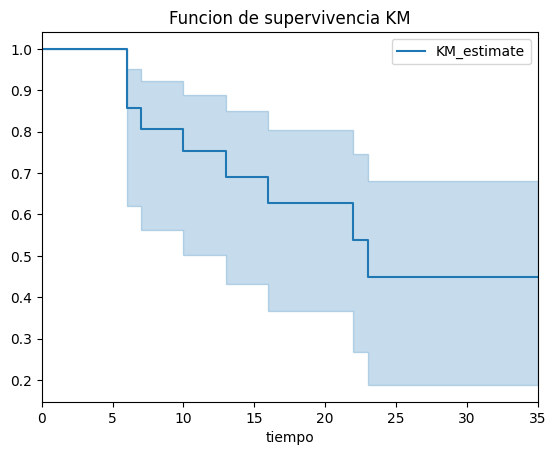

In [16]:
#Grafica de supervivencia
km1.plot_survival_function()
plt.title('Funcion de supervivencia KM')
plt.xlabel('tiempo')
plt.xlim(0,35)
plt.show()

Revisar uuna base de datos

In [19]:
relacion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [21]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


In [20]:
relacion.count()

tratamiento    42
t              42
estado         42
dtype: int64

la base contiene la informacion de 42 individuos que se encuentra en una relacion, "t" es el tiempo de suprevivencia de la relacion en semanas, el evento "que la relacion termine" esta en la columna esatdo: 1 si la relacion termino, 0 si esta censurada o no termino. La variable tratamiento contiene 1 y 0, 0 si la persona era NO detallista en la relacion y 1 si la persona era detalista

In [22]:
km_all = KaplanMeierFitter().fit(relacion['t'], relacion['estado'])

In [25]:
detallistas = relacion.query('tratamiento==1')
no_deta = relacion.query('tratamiento==0')

In [30]:
#funciones de supervivencia para deta y no deta
km_deta = KaplanMeierFitter().fit(detallistas['t'], detallistas['estado'])
km_no_deta = KaplanMeierFitter().fit(no_deta['t'], no_deta['estado'])

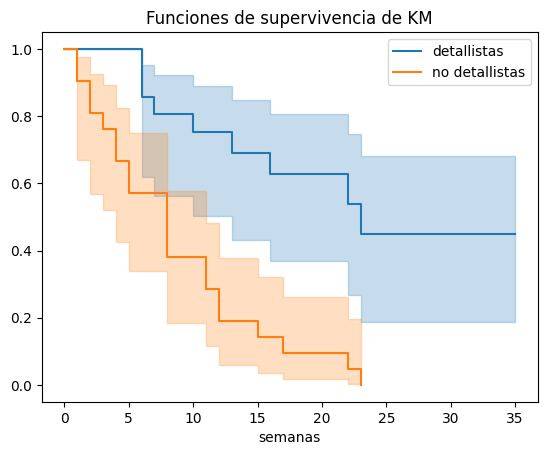

In [34]:
km_deta.plot_survival_function(label='detallistas')
km_no_deta.plot_survival_function(label='no detallistas')
plt.xlabel('semanas')
plt.title('Funciones de supervivencia de KM')
plt.show()


Para verificar las funciondes de supervivencia son distintas rrealizaremos una perueba de hipotesis log rank test

log rank test

$Ho: S(gpo1) = S(gpo2)$ funciones de superv identicas

$Ha: S(gpo1) \neq  S(gpo2)$ funcoones de superv distintas

In [40]:
LRT = logrank_test(detallistas['t'],no_deta['t'], detallistas['estado'], no_deta['estado'])
LRT.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [38]:
print(LRT.p_value.round(3))

0.0


In [44]:
print('como P value = ', LRT.p_value.round(3), '< a alfa = 0.05 rechazamos Ho, significa que las funcones de superv son distintas, por lo tanto los no detallistas temrinan su relacion mas rapido que los detaallistas' )

como P value =  0.0 < a alfa = 0.05 rechazamos Ho, significa que las funcones de superv son distintas, por lo tanto los no detallistas temrinan su relacion mas rapido que los detaallistas
